#Anomaly Detection & Time Series

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
    Answer:

    Anomaly Detection is the process of identifying data points, observations, or patterns that deviate significantly from the majority of the data. These unusual patterns are called anomalies or outliers and may indicate fraud, system failures, rare events, or errors.

    Types of Anomalies
    1. Point Anomaly

    A single observation that is significantly different from the rest.

    Example:
    In the NYC Taxi Fare Data, if most fares range between $5–$50, but one fare is $500, it is a point anomaly.

    2. Contextual Anomaly

    An observation that is anomalous in a specific context (e.g., time, location).

    Example:
    In the AirPassengers Dataset, high passenger count in December may be normal, but the same value in February could be anomalous.

    3. Collective Anomaly

    A group of observations that are anomalous together but may not be anomalous individually.

    Example:
    Sudden continuous drop in energy consumption for 3 hours in a power grid system may indicate a system failure.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
   
   
    Answer:
    Algorithm	Approach	Suitable Use Case
    Isolation Forest	Randomly isolates points using decision trees. Anomalies require fewer splits.	Large datasets, high-dimensional data
    DBSCAN	Density-based clustering. Points in low-density regions are anomalies.	Spatial data, clusters of arbitrary shapes
    Local Outlier Factor (LOF)	Compares local density of a point to neighbors.	Detecting local density variations
    Comparison Summary Isolation Forest: Fast and scalable.
    DBSCAN: Good for spatial anomaly detection.
    LOF: Best when anomaly is relative to neighborhood.

Question 3: What are the key components of a Time Series? Explain each with one example.
Answer:

    A Time Series consists of observations recorded over time.Key Components
    Trend Long-term upward or downward movement.
    Example: Increasing passengers in the AirPassengers Dataset over years.
    Seasonality Repeating patterns at fixed intervals.
    Example: Higher airline traffic during holidays.
    Cyclical Long-term oscillations without fixed period.
    Example: Economic boom and recession cycles.
    Residual (Noise) Random variation not explained by other components.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
Answer:

A stationary time series is a series whose statistical properties remain constant over time. This means the mean does not change, the variance remains constant, and the relationship between observations depends only on the time lag and not on the actual time at which it is observed. In other words, the series does not show long-term trends or changing variability.

For example, the original AirPassengers Dataset is non-stationary because it shows a clear upward trend and increasing seasonal fluctuations over time.

To test whether a time series is stationary, we can first visually inspect the plot of the series. If the mean or variance appears to change over time, the series is likely non-stationary. A more formal statistical method is the Augmented Dickey–Fuller (ADF) test. In this test, the null hypothesis states that the series is non-stationary. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the series is stationary.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer (In Short):

AR (p) uses past values of the series to predict the current value. It is suitable for stationary data without seasonality.

MA (q) uses past error terms to predict the current value. It is useful for modeling short-term shocks in stationary data.

ARIMA (p, d, q) combines AR and MA with differencing (d) to make non-stationary data stationary. It is used for non-seasonal time series.

SARIMA (p, d, q)(P, D, Q, s) extends ARIMA by adding seasonal components. It is suitable for seasonal time series like the AirPassengers Dataset.

SARIMAX is SARIMA with exogenous (external) variables. It is used when outside factors (e.g., weather, promotions) influence the time series.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it.

Successfully downloaded AirPassengers.csv


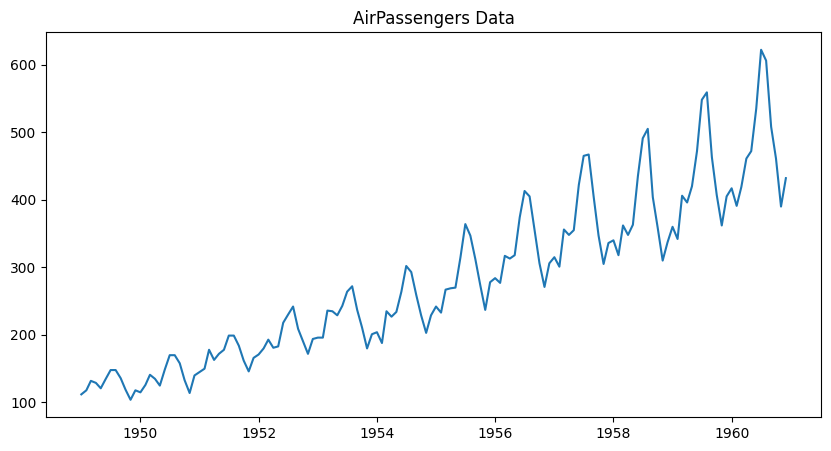

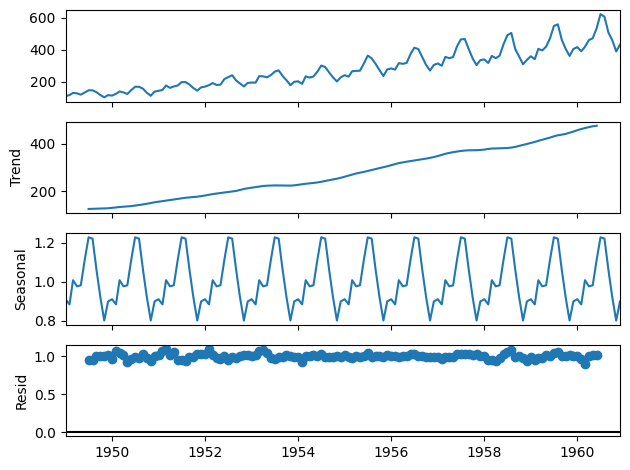

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


import requests
import os

file_name = 'AirPassengers.csv'

if os.path.exists(file_name):

    os.remove(file_name)


if not os.path.exists(file_name):
    url = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)
        print(f"Successfully downloaded {file_name}")
    else:
        print(f"Error downloading file: {response.status_code} - {response.reason}")
        print("Please check the URL or your internet connection.")

        raise ConnectionError(f"Failed to download {file_name}. Status code: {response.status_code}")


df_raw = pd.read_csv(file_name)


df_raw.columns = df_raw.columns.str.strip()


df_raw['Month'] = pd.to_datetime(df_raw['Month'], format='%Y-%m')
df = df_raw.set_index('Month')

plt.figure(figsize=(10,5))
plt.plot(df)
plt.title("AirPassengers Data")
plt.show()


decomposition = seasonal_decompose(df, model='multiplicative', period=12)
decomposition.plot()
plt.show()

Question 8: Train SARIMA model and forecast next 12 months

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


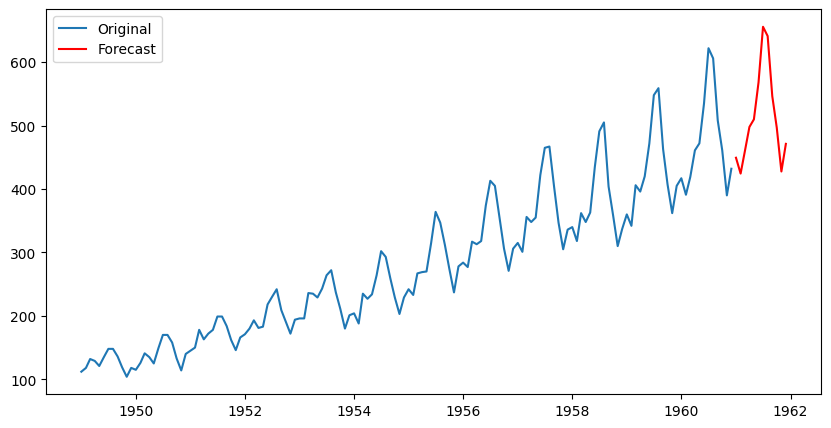

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['#Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit()

forecast = results.forecast(steps=12)

plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

Question 9: Apply Local Outlier Factor (LOF)

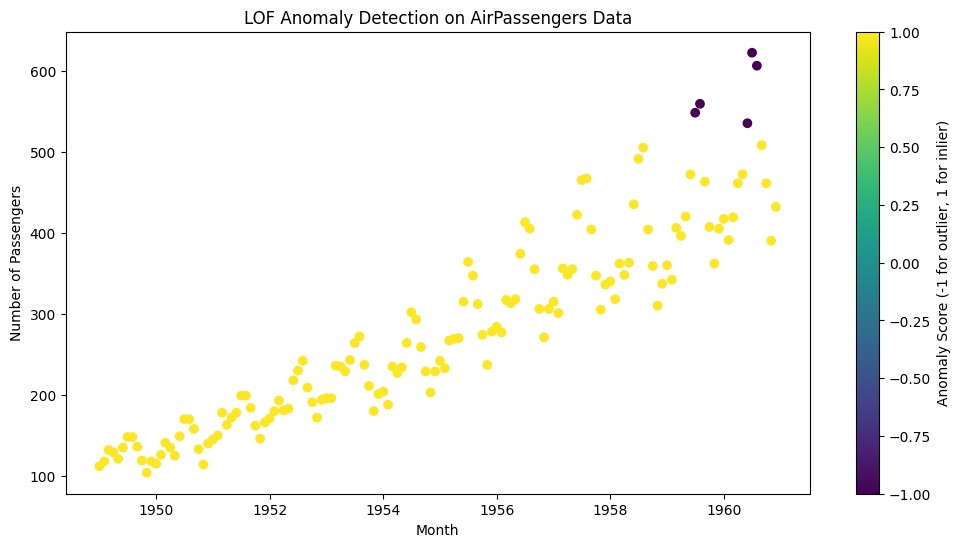

In [14]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

lof = LocalOutlierFactor(n_neighbors=20)
X = df[['#Passengers']] # Define X using the passenger data
df['lof_anomaly'] = lof.fit_predict(X)

# Plot the original data and highlight anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['#Passengers'], c=df['lof_anomaly'], cmap='viridis')
plt.title("LOF Anomaly Detection on AirPassengers Data")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.colorbar(label='Anomaly Score (-1 for outlier, 1 for inlier)')
plt.show()

Question 10: Real-Time Energy Forecasting & Anomaly Detection Workflow

Answer:

In a power grid monitoring company, the goal is to forecast short-term energy demand and detect abnormal spikes or drops in real-time data collected every 15 minutes. The workflow would include data ingestion, preprocessing, anomaly detection, forecasting, validation, and continuous monitoring.

For anomaly detection in streaming data, Isolation Forest would be preferred because it is fast, scalable, and works well with high-dimensional real-time data. It isolates anomalies instead of profiling normal points, making it efficient for large streaming datasets. A sliding time window approach (for example, last 24 hours of 15-minute intervals) would be used to continuously retrain or update the anomaly detection model. If the anomalies depend strongly on local density patterns, Local Outlier Factor (LOF) could also be used, but Isolation Forest is generally more suitable for real-time systems due to better scalability.

For short-term forecasting, SARIMAX would be the best choice. Since energy consumption shows daily and weekly seasonality and is influenced by external factors like weather conditions, SARIMAX allows inclusion of exogenous variables such as temperature and humidity. It captures trend, seasonality, and external effects, making it highly suitable for 15-minute interval forecasting.

Model validation would be done using rolling or walk-forward v